# Regression task to predict house prices
This project is based on the data input from the following Kaggle data set: https://www.kaggle.com/datasets/shree1992/housedata

In this AI project, the goal is to create an accurate price prediction model.

In [449]:
# import crucial packages

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.express as px
import plotly.graph_objects as px

In [450]:
# load the data set

df = pd.read_csv("data/data.csv")

df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [451]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [453]:
# Correlations of the "Price" dependent variable

price_correlations = df.select_dtypes(['float64', 'int64']).corr()["price"].sort_values(ascending=False)

print(price_correlations)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


In [454]:
# Determine all features containing a nan-value
nan_features = [feature for feature in df.columns if df[feature].isnull().sum()>1]

# Print feature name an percentage of features

for feature in nan_features:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing value')


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [456]:
# Convert to "date" feature to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

# Create a new column with only the year
df['year'] = df['date'].dt.year

# Drop "date" column
df.drop(columns= "date", inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  year           4600 non-null   int32  
dtypes: float

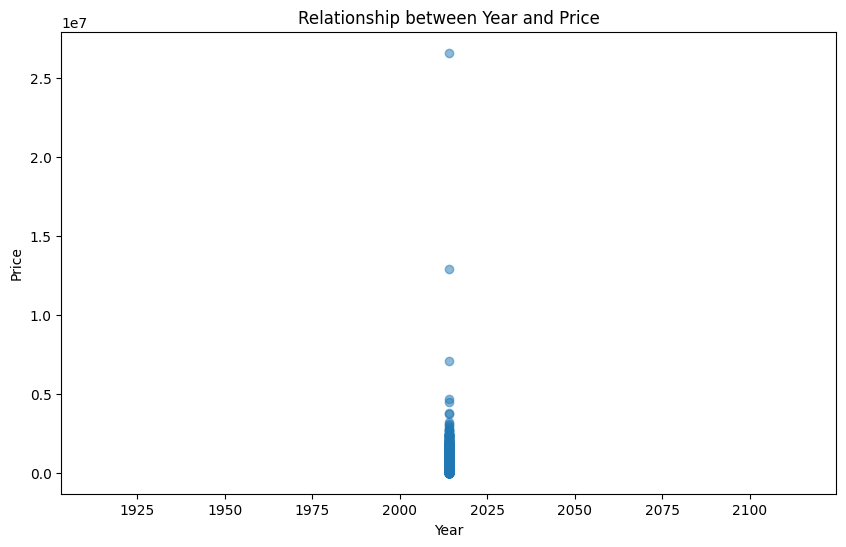

In [457]:
# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], alpha=0.5)
plt.title('Relationship between Year and Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### As the column "yr_renovated" contains many values containing a 0, we assume that there was no renovation in place and therefore the year can be inserted of the column "yr_built"

In [458]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']

## EDA Part

/var/folders/7f/lz8t8yrj0755nqv_kddd2ps00000gn/T/ipykernel_83793/167832540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_columns['price'] = df['price']


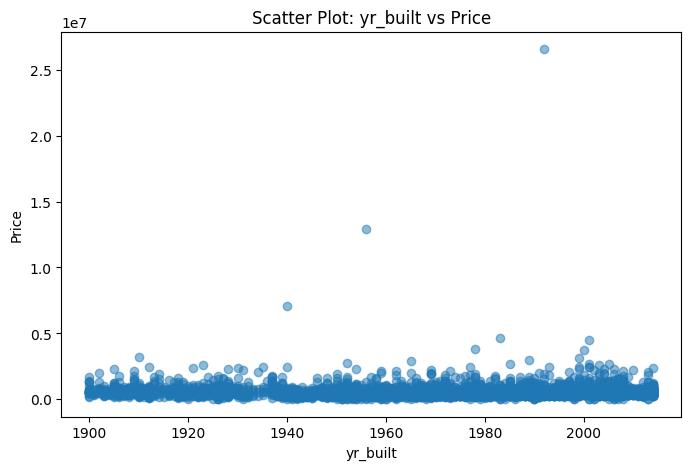

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/denco_23/Documents/AI/Projects/Regression/House_Price_Prediction/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/7f/lz8t8yrj0755nqv_kddd2ps00000gn/T/ipykernel_83793/167832540.py", line 13, in <module>
    plt.show()
  File "/Users/denco_23/Documents/AI/Projects/Regression/House_Price_Prediction/venv/lib/python3.11/site-packages/matplotlib/pyplot.py", line 527, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/denco_23/Documents/AI/Projects/Regression/House_Price_Prediction/venv/lib/python3.11/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/Users/denco_23/Documents/AI/Projects/Regression/House_Price_Prediction/venv/lib/python3.11/site-packages/IPython/core/display_functions.py", line 298, in display
   

In [459]:
year_columns = df.filter(like='yr')

# Add the "price" column to the selected columns
year_columns['price'] = df['price']

# Create scatter plots for each year column
for column in year_columns.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(year_columns[column], year_columns['price'], alpha=0.5)
    plt.title(f'Scatter Plot: {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

### While observing the association between the two year columns and the price column, a slight correlation of the house price could be indicated. However, we will exclude the outlier prices to increase a more precise overview and the scale might be squeezed together

In [ ]:
# Sort the DataFrame by the 'price' column in descending order
df_sorted = df.sort_values(by='price', ascending=False)

# Drop the top three rows with the highest prices
df_trimmed = df_sorted.iloc[3:]

# Display the resulting DataFrame
print(df_trimmed)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2654  4668000.0       5.0       6.75         9640     13068     1.0   
2761  4489000.0       4.0       3.00         6430     27517     2.0   
3729  3800000.0       5.0       5.50         7050     42840     1.0   
1637  3710000.0       4.0       3.50         5550     28078     2.0   
252   3200000.0       7.0       4.50         6210      8856     2.5   
...         ...       ...        ...          ...       ...     ...   
4472        0.0       4.0       3.75         4060     19290     2.0   
4567        0.0       4.0       2.50         4080     18362     2.0   
4354        0.0       3.0       1.75         1490     10125     1.0   
4454        0.0       5.0       2.50         2090      4698     2.0   
4382        0.0       5.0       4.50         4630      6324     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
2654           1     4          3        4820           4820      1983   

/var/folders/7f/lz8t8yrj0755nqv_kddd2ps00000gn/T/ipykernel_83793/1283531694.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_columns['price'] = df_trimmed['price']


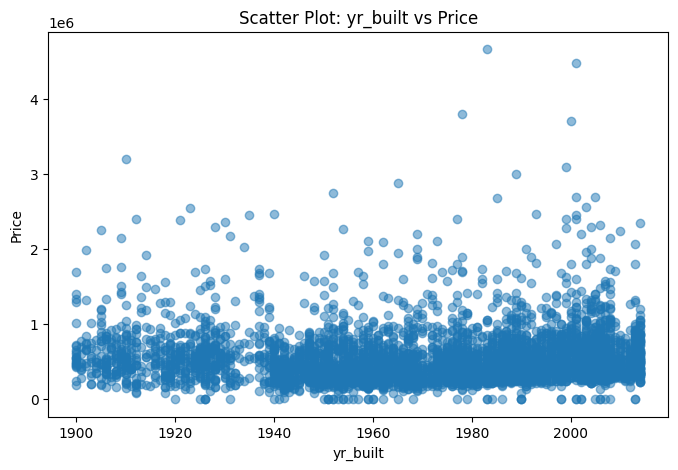

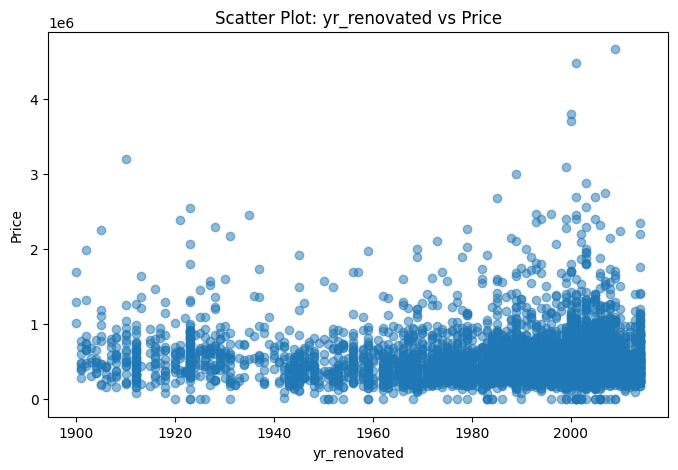

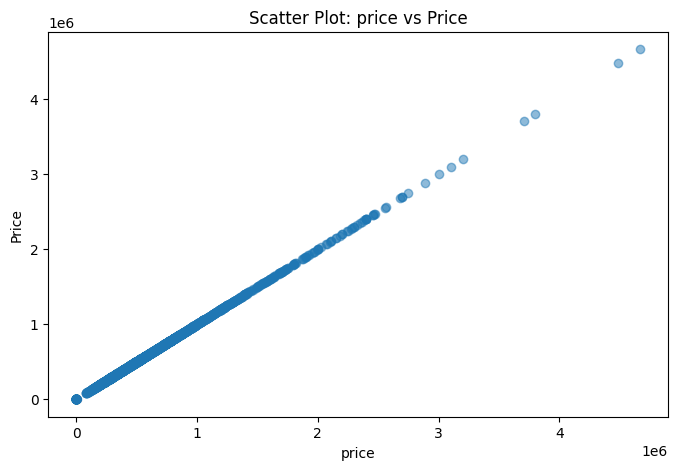

In [ ]:
year_columns = df_trimmed.filter(like='yr')

# Add the "price" column to the selected columns
year_columns['price'] = df_trimmed['price']

# Create scatter plots for each year column
for column in year_columns.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(year_columns[column], year_columns['price'], alpha=0.5)
    plt.title(f'Scatter Plot: {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

In [ ]:
# Compute the correlation matrix for the trimmed DataFrame
correlation_matrix = df_trimmed[['yr_built', 'yr_renovated', 'price']].corr()

# Extract the correlation coefficient between 'yr_built' and 'yr_renovated'
"""correlation_coefficient = correlation_matrix.loc['yr_built', 'yr_renovated']

print(f'Correlation coefficient between yr_built and yr_renovated: {correlation_coefficient}')"""

print(correlation_matrix)

              yr_built  yr_renovated     price
yr_built      1.000000      0.461080  0.030991
yr_renovated  0.461080      1.000000 -0.007307
price         0.030991     -0.007307  1.000000


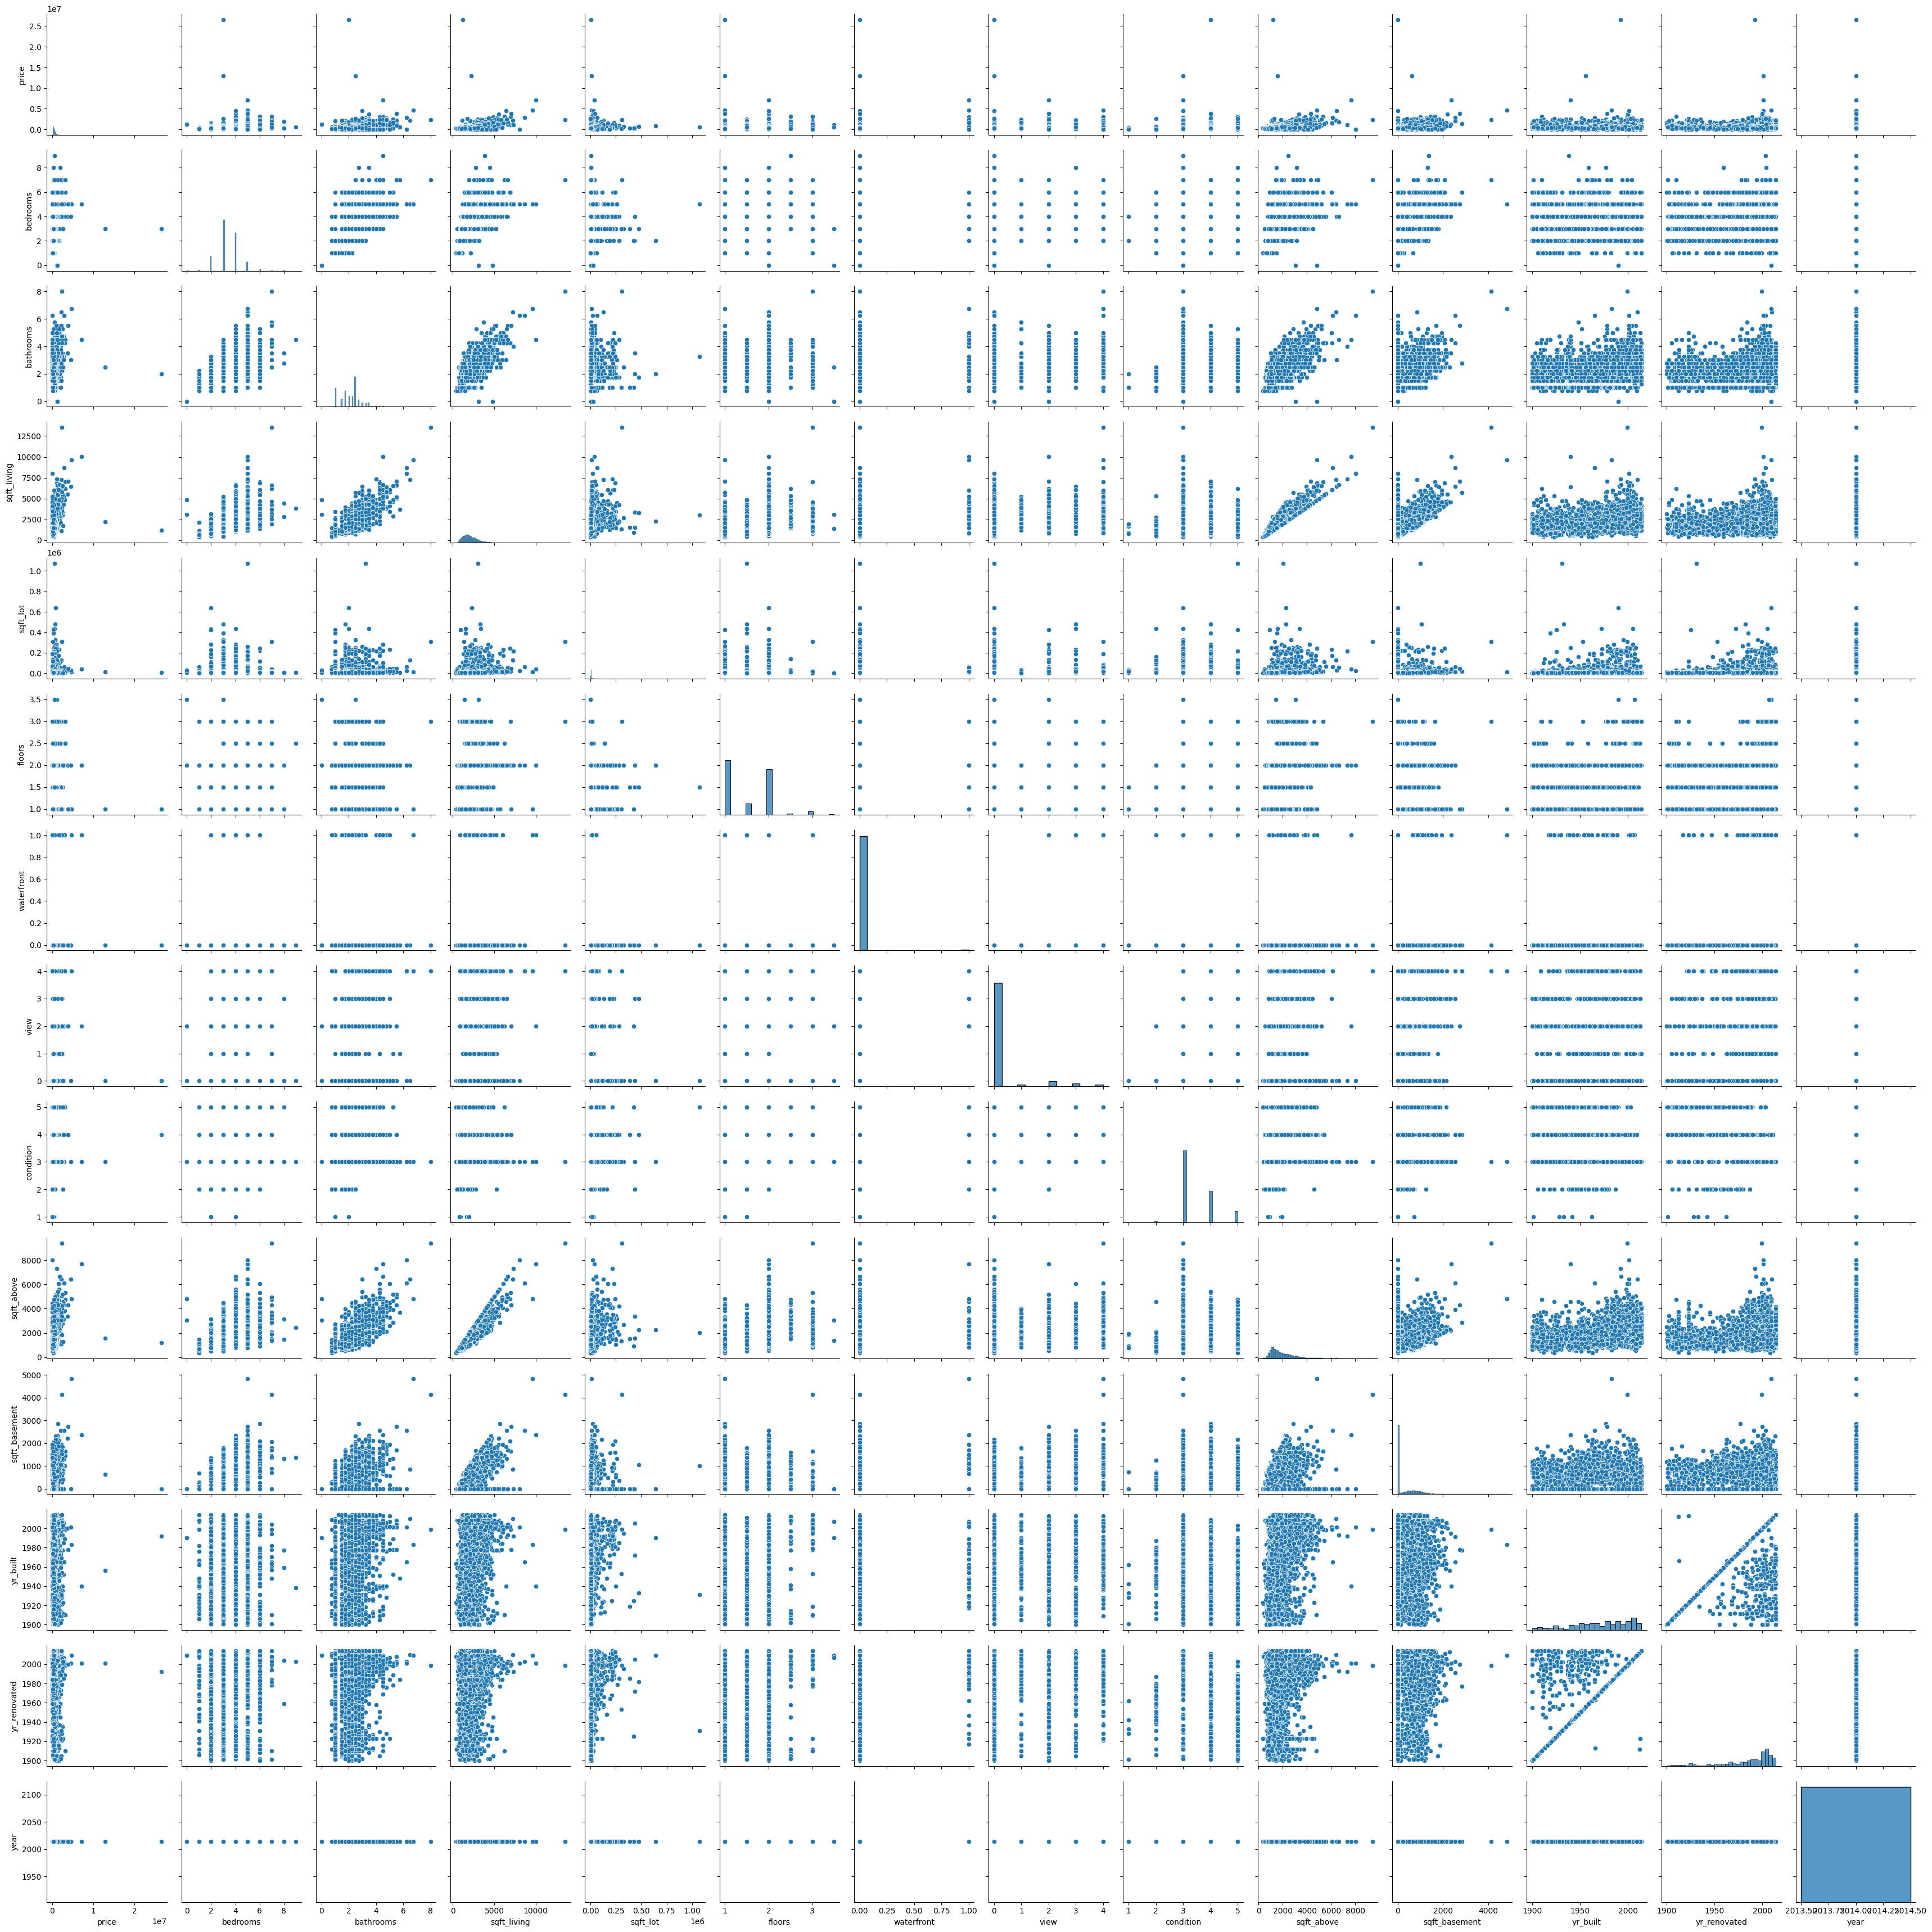

In [ ]:
sns.pairplot(df)

# Feature Selection

In [ ]:
# Ensure all columns containing non-numeric data are excluded
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create an empty dictionary to store correlation coefficients
correlation_dict = {}

# Iterate through numeric columns and calculate correlations
for column in numeric_columns.columns:
    correlation_coefficient = df['price'].corr(df[column])
    correlation_dict[column] = correlation_coefficient

# Convert the dictionary to a DataFrame for easier sorting
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlation'])

# Sort the DataFrame by correlation coefficients in descending order
correlation_df_sorted = correlation_df.sort_values(by='Correlation', ascending=False)

# Display the sorted correlation coefficients
print("Sorted correlation coefficients with respect to 'Price':")
print(correlation_df_sorted)

Sorted correlation coefficients with respect to 'Price':
          Feature  Correlation
0           price     1.000000
3     sqft_living     0.430410
9      sqft_above     0.367570
2       bathrooms     0.327110
7            view     0.228504
10  sqft_basement     0.210427
1        bedrooms     0.200336
5          floors     0.151461
6      waterfront     0.135648
4        sqft_lot     0.050451
8       condition     0.034915
11       yr_built     0.021857
12   yr_renovated     0.002289


### Observations
- The "year" columns have the lowest association / linear relationship wit the price column
- The "sqft_living" and "sqft_above" have the highest correlation scores, achieving moderate correlation. Followed by the "bathrooms" quantity which should have a causal relationship with the two square foot features. Thus, these attributes could be crucial for the model and the feature selection

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a variable that only creates numeric values of the dataframe

num_df = df.select_dtypes(include=['float64', 'int64'])
num_df.drop(columns="price", inplace=True)

vif_data = pd.DataFrame()

vif_data["Feature"] = num_df.columns

# calculate the variance inflation factor (VIF)
vif_data["VIF"] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]

vif_data

/Users/denco_23/Documents/AI/Projects/Regression/House_Price_Prediction/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,bedrooms,24.985779
1,bathrooms,26.322622
2,sqft_living,inf
3,sqft_lot,1.258473
4,floors,16.425879
5,waterfront,1.163640
6,view,1.468110
7,condition,29.262674
8,sqft_above,inf
9,sqft_basement,inf


### Observation
- "Inf" values: as sqft_living, sqft_above, and sqft_basement all seem to have very high multi collinearity, only one of these values is considered to be part of the model creation, sqft_living. As sqft_living is the sum of sqft_above and sqft_basement, these two features are dropped to make the model efficiet and decrease multicoliniearity.
- Due to high multicolinearity and a high amount of missing values, the yr_renovated column will also be dropped

In [ ]:
columns_to_drop = ['sqft_above', 'sqft_basement', 'yr_renovated']  # List of column names to drop
num_df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
num_df.select_dtypes(include=['float64', 'int64'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1955
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,1921
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1966
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1963
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1976
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1954
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1983
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,2009
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1974


In [ ]:
num_df.waterfront.value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

In [ ]:
num_df[['bedrooms', 'bathrooms', 'floors', 'price']].corr()

,bedrooms,bathrooms,floors,price
bedrooms,1.000000,0.545920,0.177895,0.200336
bathrooms,0.545920,1.000000,0.486428,0.327110
floors,0.177895,0.486428,1.000000,0.151461
price,0.200336,0.327110,0.151461,1.000000


### Outliers

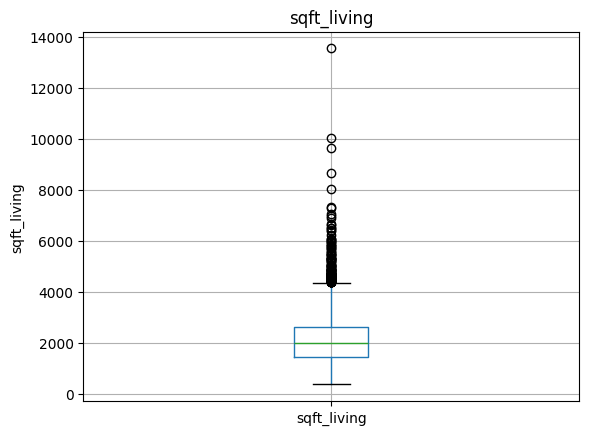

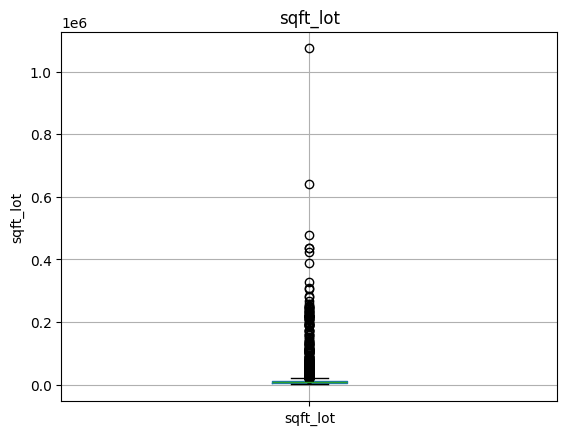

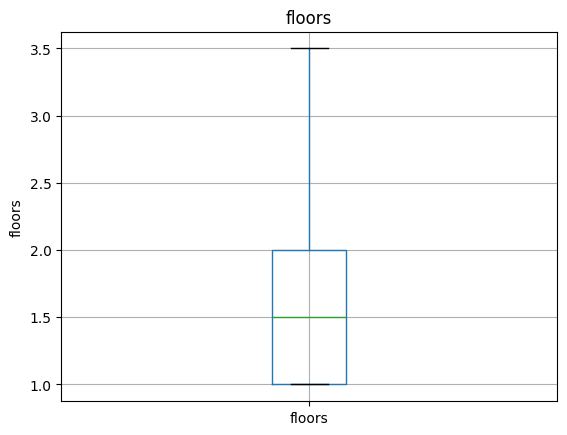

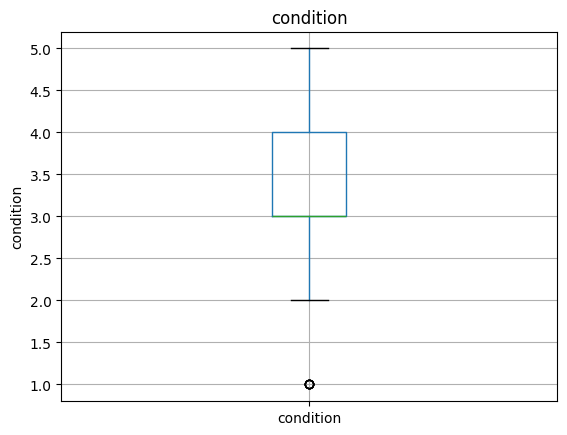

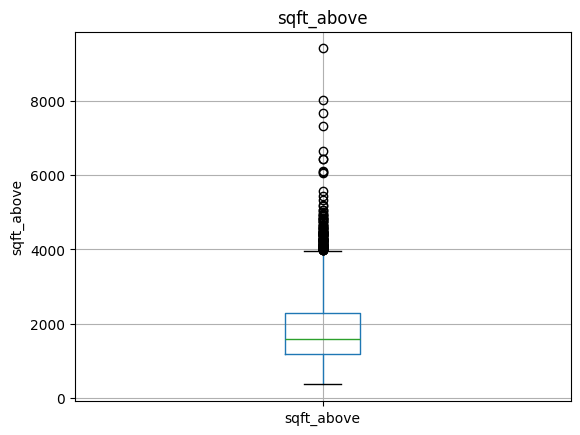

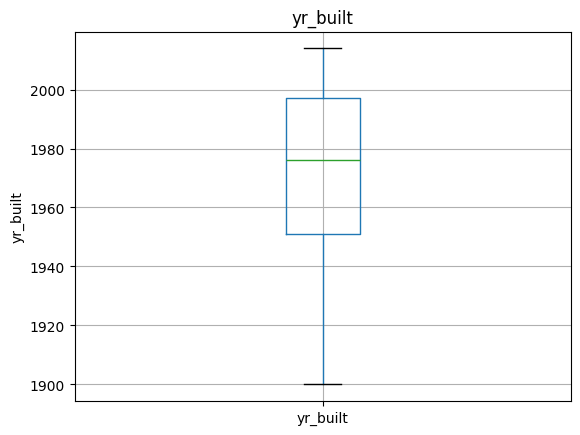

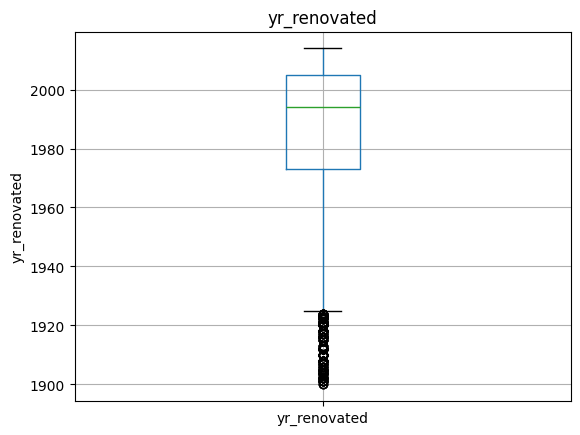

In [ ]:
df.head()
continuous_features = [feature for feature in df.columns if df[feature].dtype in ['float64', 'int64']]
for feature in continuous_features:
    df_log=df.copy()
    
    if 0 in df[feature].unique():
        pass
    else:
        df_log[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


                

# Feature Engineering

In [460]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'year'],
      dtype='object')

In [464]:
## Temporal Variables (Date Time Variables)

for feature in ['yr_built','yr_renovated']:
       
    df[feature]=df['year']-df[feature]
# no need to keep the year column anymore 
df.drop(columns="year", inplace=True)

In [465]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,59,9,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,93,93,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,48,48,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,51,51,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,38,22,9105 170th Ave NE,Redmond,WA 98052,USA


### Numerical Variable

In [467]:
# convert numerical values as the are skewed 
num_features=['bedrooms', 'bathrooms', 'floors', 'price', 'sqft_living', 'sqft_lot']

for feature in num_features:
    df[feature]=np.log(df[feature])

/Users/denco_23/Documents/AI/Projects/Regression/House_Price_Prediction/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/denco_23/Documents/AI/Projects/Regression/House_Price_Prediction/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


feature_scale=[feature for feature in df.columns if feature not in ['Id', 'price]]

### Categorical Variable

In [ ]:
features_nan =[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}:{}%".format(feature, np.round(df[feature].isnull().mean()*100, 4)))



### New Features - Year Variables

In [ ]:
xdf.yr_renovated.isnull().sum()

0

### Normalization of Independent Variables

Logarithmic transformation can help normalize the distribution of skewed or heteroscedastic variables. This can improve the performance of regression models that assume normally distributed residuals, such as linear regression.

/Users/denco_23/Documents/AI/Projects/Regression/House_Price_Prediction/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


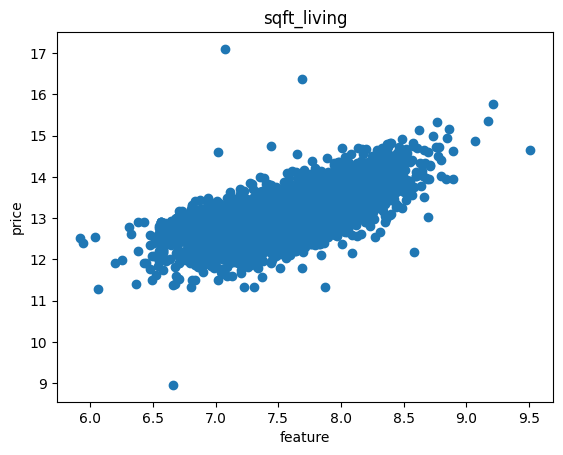

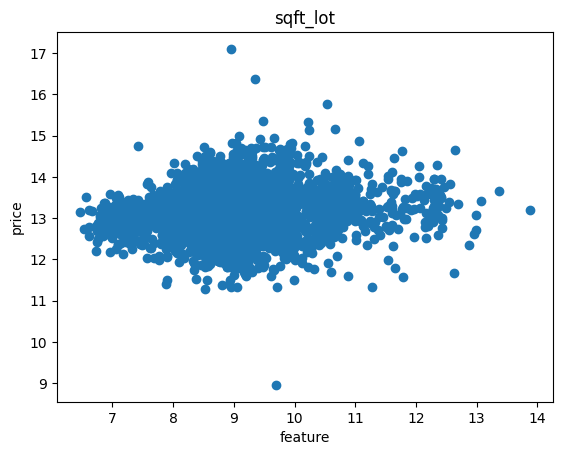

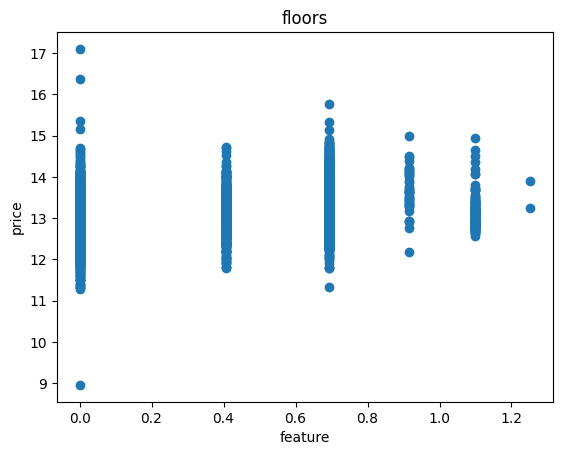

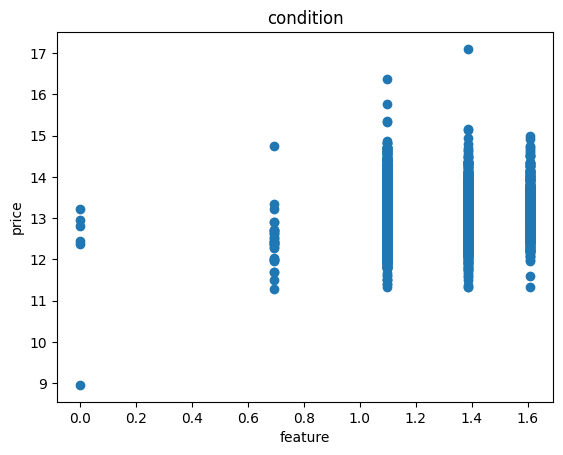

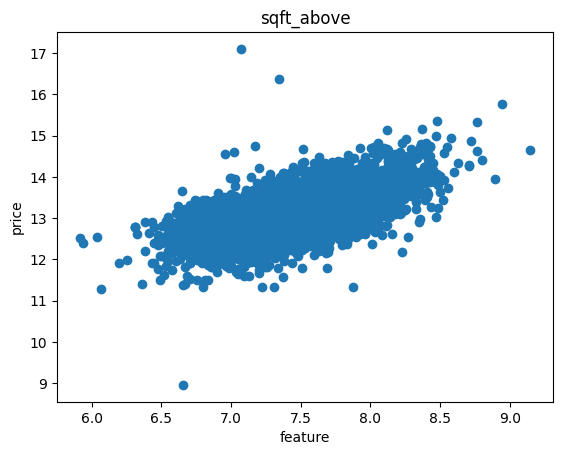

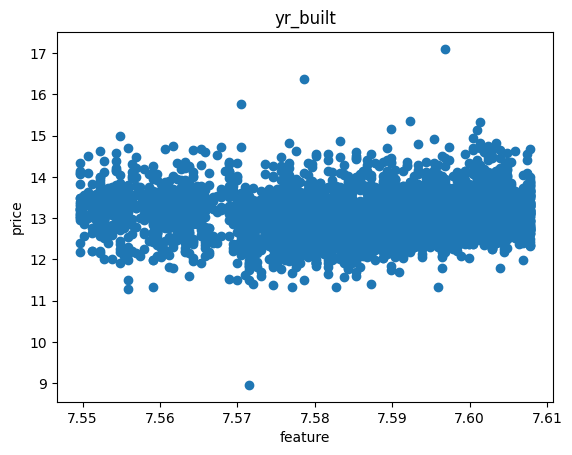

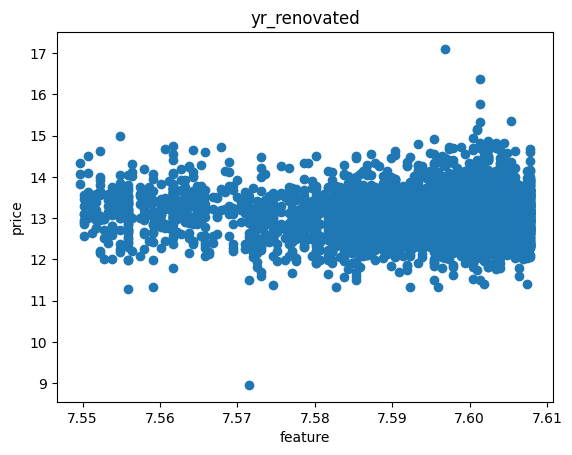

In [ ]:
# conduct logarithmic transformation to improve the results of the model
continuous_features = [feature for feature in df.columns if df[feature].dtype in ['float64', 'int64']]
for feature in continuous_features:
    df_log = df.copy()
    if 0 in df_log[feature].unique():
        pass
    else:
        df_log[feature]=np.log(df_log[feature])
        df_log['price']=np.log(df_log['price'])
        plt.scatter(df_log[feature], df_log['price'])
        plt.xlabel('feature')
        plt.ylabel('price')
        plt.title(feature)
        plt.show()


In [ ]:
categorical_features=[feature for feature in df.columns if df_log[feature].dtypes=="O"]
categorical_features

['street', 'city', 'statezip', 'country']

In [ ]:
# now focus on how many different categories we have in the categorical features
# provides insights how to handle these

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(df[feature].unique())))

The feature is street and number of categories are 4525
The feature is city and number of categories are 44
The feature is statezip and number of categories are 77
The feature is country and number of categories are 1


### Observation
- no missing values detected
- independent values that contain outliers: "sqft_living", "sqft_lot", "condition", "yr_renovated"